Le simulazioni di un oscillatore nonlineare immerso in un bagno sono state affette dal fenomeno della dissipazione numerica anche se ho utilizzato un algoritmo di integrazione simplettico - Yoshida al quarto ordine. 

Adesso tali simulazioni sembrano mostrare un rate di dissipazione più contenuto, adottando i seguenti parametri:

$$
r = 10^{-4}, \qquad \mbox{num_samples} = 10^{5}, \qquad h = 10^{-2}, \qquad \mbox{steps} = 10^{3}
$$

In [1]:
# parametri fisici oscillatore
m = 1.
omega = 1.
r = 0. #0.05

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Definisci il nome del file di input
nome_file_q = "q_trajectory_ensemble.txt"
nome_file_p = "p_trajectory_ensemble.txt"
nome_file_zeta = "zeta_trajectory_ensemble.txt"

nome_file_q_quadro = "q_square_trajectory_ensemble.txt"
nome_file_p_quadro = "p_square_trajectory_ensemble.txt"

nome_file_corr_q_quadro = "corr_q_square_ensemble.txt"
nome_file_corr_p_quadro = "corr_p_square_ensemble.txt"
nome_file_corr_omega = "corr_omega_ensemble.txt"

nome_file_omega = "omega_trajectory_ensemble.txt"
nome_file_omega_integrata = "integral_omega_ensemble.txt"


# Inizializza un array vuoto per i numeri
numeri_q = []
numeri_p = []
numeri_z = []

# Leggi il file di testo e memorizza i numeri in un array
with open(nome_file_q, "r") as file:
    for riga in file:
        numero = float(riga.strip())  # Converte la riga in un numero in virgola mobile
        numeri_q.append(numero)
        
# Leggi il file di testo e memorizza i numeri in un array
with open(nome_file_p, "r") as file:
    for riga in file:
        numero = float(riga.strip())  # Converte la riga in un numero in virgola mobile
        numeri_p.append(numero)
        
# Leggi il file di testo e memorizza i numeri in un array
with open(nome_file_zeta, "r") as file:
    for riga in file:
        numero = float(riga.strip())  # Converte la riga in un numero in virgola mobile
        numeri_z.append(numero)


numeri_q_quadro = []
numeri_p_quadro = []

# Leggi il file di testo e memorizza i numeri in un array
with open(nome_file_q_quadro, "r") as file:
    for riga in file:
        numero = float(riga.strip())  # Converte la riga in un numero in virgola mobile
        numeri_q_quadro.append(numero)
        
# Leggi il file di testo e memorizza i numeri in un array
with open(nome_file_p_quadro, "r") as file:
    for riga in file:
        numero = float(riga.strip())  # Converte la riga in un numero in virgola mobile
        numeri_p_quadro.append(numero)

numeri_corr_q_quadro = []
numeri_corr_p_quadro = []
numeri_corr_omega = []

# Leggi il file di testo e memorizza i numeri in un array
with open(nome_file_corr_q_quadro, "r") as file:
    for riga in file:
        numero = float(riga.strip())  # Converte la riga in un numero in virgola mobile
        numeri_corr_q_quadro.append(numero)
        
# Leggi il file di testo e memorizza i numeri in un array
with open(nome_file_corr_p_quadro, "r") as file:
    for riga in file:
        numero = float(riga.strip())  # Converte la riga in un numero in virgola mobile
        numeri_corr_p_quadro.append(numero)
        
# Leggi il file di testo e memorizza i numeri in un array
with open(nome_file_corr_omega, "r") as file:
    for riga in file:
        numero = float(riga.strip())  # Converte la riga in un numero in virgola mobile
        numeri_corr_omega.append(numero)


numeri_omega = []
numeri_omega_integrata = []

# Leggi il file di testo e memorizza i numeri in un array
with open(nome_file_omega, "r") as file:
    for riga in file:
        numero = float(riga.strip())  # Converte la riga in un numero in virgola mobile
        numeri_omega.append(numero)
        
# Leggi il file di testo e memorizza i numeri in un array
with open(nome_file_omega_integrata, "r") as file:
    for riga in file:
        numero = float(riga.strip())  # Converte la riga in un numero in virgola mobile
        numeri_omega_integrata.append(numero)

In [4]:
# Converti la lista di numeri in un array NumPy
q_trajectory_ensemble = np.array(numeri_q)
p_trajectory_ensemble = np.array(numeri_p) 
z_trajectory_ensemble = np.array(numeri_z) 

q_square_trajectory_ensemble = np.array(numeri_q_quadro) 
p_square_trajectory_ensemble = np.array(numeri_p_quadro) 

corr_q_quadro = np.array(numeri_corr_q_quadro) 
corr_p_quadro = np.array(numeri_corr_p_quadro) 
correlazione_omega = np.array(numeri_corr_omega) 

omega_trajectory_ensemble = np.array(numeri_omega) 
omega_integrata_trajectory_ensemble = np.array(numeri_omega_integrata) 

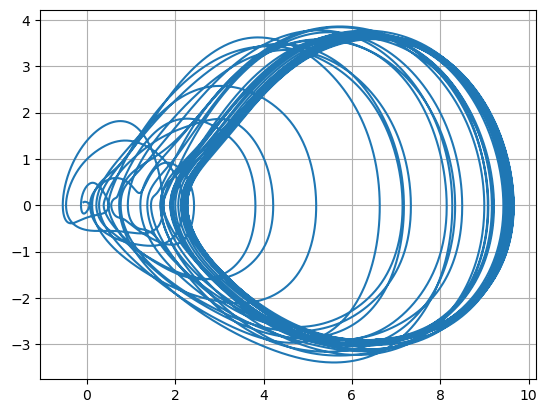

In [23]:
plt.plot(q_trajectory_ensemble, p_trajectory_ensemble)
plt.grid(True)

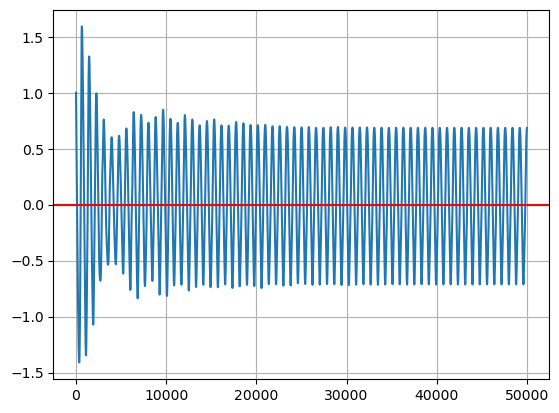

In [24]:
plt.plot(z_trajectory_ensemble)
plt.axhline(y=0., color = "r")
plt.grid(True)

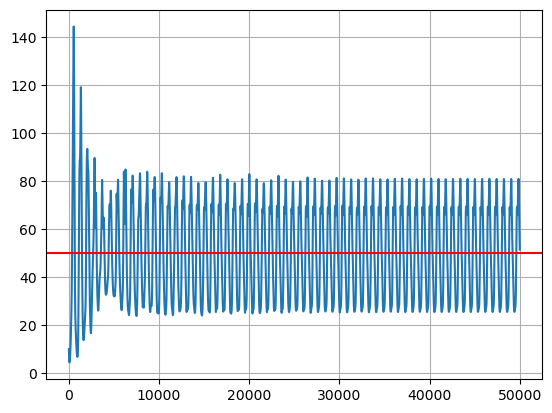

In [25]:
plt.plot(p_square_trajectory_ensemble)
plt.axhline(y=50, color = "r")
plt.grid(True)

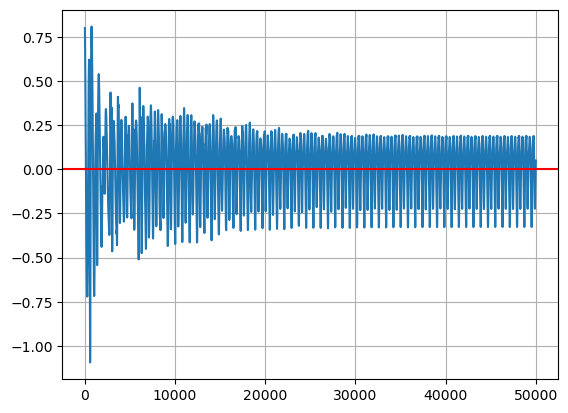

In [26]:
plt.plot(omega_trajectory_ensemble)
plt.axhline(y=0., color = "r")
plt.grid(True)

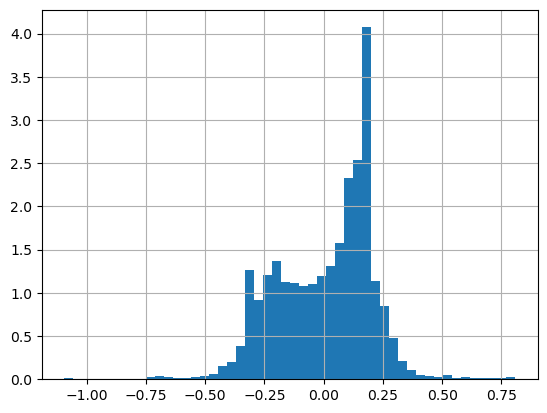

In [27]:
plt.hist(omega_trajectory_ensemble, density = True, bins = 50);
plt.grid(True)

In [22]:
np.mean(omega_trajectory_ensemble)

0.0090932397516382

In [9]:
len(omega_integrata_trajectory_ensemble)

50000

In [12]:
omega_integrata_media = [omega_integrata_trajectory_ensemble[i]/(1+i*0.01) for i in range(0, len(omega_integrata_trajectory_ensemble))]

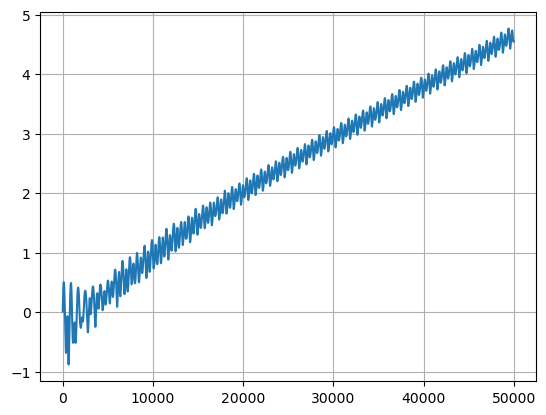

In [28]:
plt.plot(omega_integrata_trajectory_ensemble)
plt.grid(True)

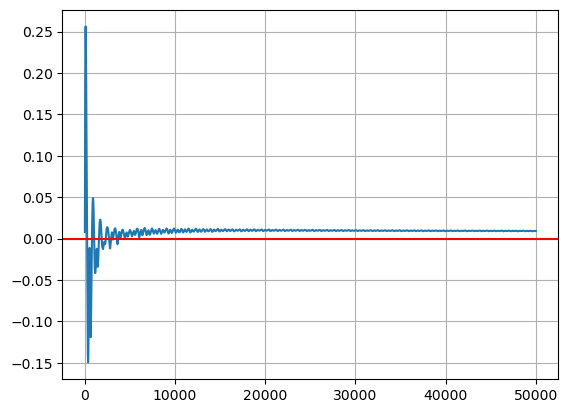

In [29]:
plt.plot(omega_integrata_media)
plt.axhline(y=0., color = "r")
plt.grid(True)

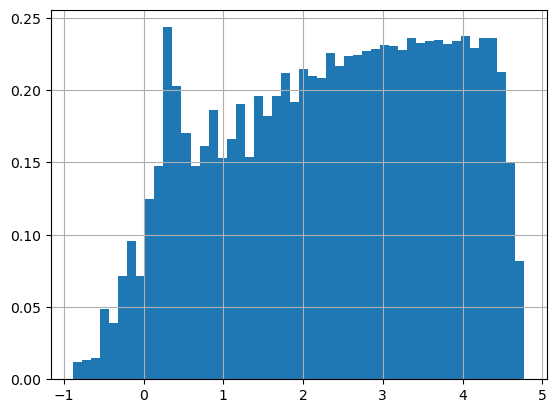

In [31]:
plt.hist(omega_integrata_trajectory_ensemble, density = True, bins = 50);
plt.grid(True)


(-0.03, 0.03)

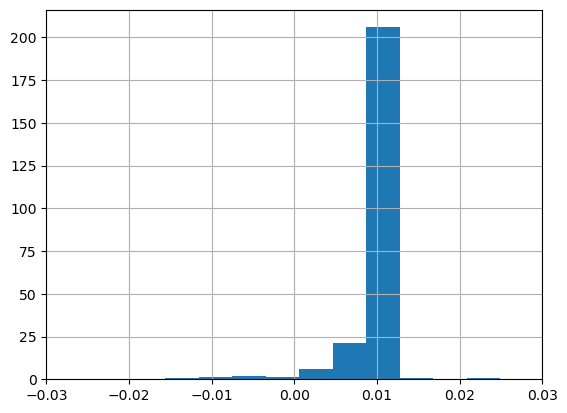

In [38]:
plt.hist(omega_integrata_media, density = True, bins = 100);
plt.grid(True)
plt.xlim([-0.03, 0.03])

In [39]:
np.mean(p_square_trajectory_ensemble)

49.9567078948

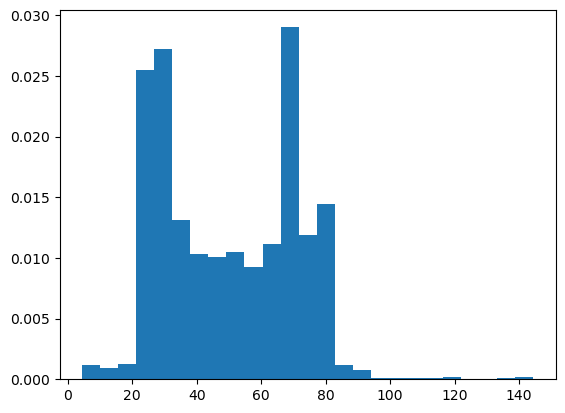

In [40]:
plt.hist(p_square_trajectory_ensemble, density = True, bins = 25);

In [41]:
def energy(q, p):
    return p**2/(2*m) + (m*omega**2)*(q**2)/2 + (r/4)*(q**4)

In [42]:
energy_trajectory = energy(q_trajectory_ensemble, p_trajectory_ensemble)

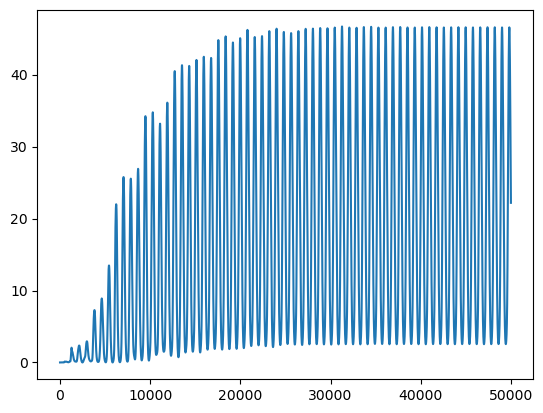

In [43]:
plt.plot(energy_trajectory)

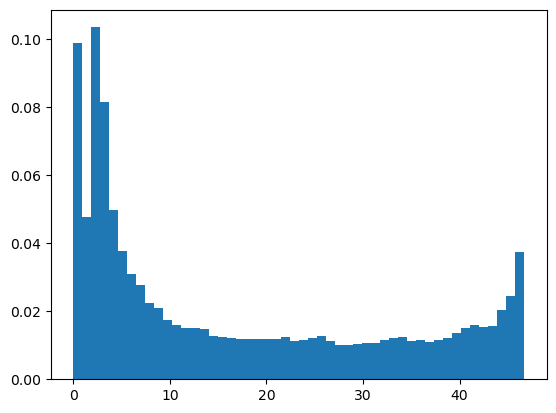

In [46]:
plt.hist(energy_trajectory, density=True, bins=50);

In [47]:
np.min(energy_trajectory)

0.001524088793802248

In [48]:
np.max(energy_trajectory)

46.69731685852401

In [49]:
np.mean(energy_trajectory)

16.65944143425784

In [50]:
np.std(energy_trajectory)

15.583176694933254